<img style="position: absolute; top: 2rem; right: 1rem;" src="https://matplotlib.org/3.2.1/_static/logo2_compressed.svg" width="200px" />

# Aula 08 - Aprofundando no Matplotlib II
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn') # Definindo o tema do Matplotlib

## Revisando...

In [10]:
df = pd.read_clipboard() # Leitura de uma tabela que foi copiada para a área de transferência (Ctrl + C)

In [11]:
df

,Peso (kg),Altura (cm),Idade
0,72,180,31
1,80,170,21
2,60,175,16
3,90,174,28
4,100,185,23


In [13]:
df.values

array([[ 72, 180,  31],
       [ 80, 170,  21],
       [ 60, 175,  16],
       [ 90, 174,  28],
       [100, 185,  23]])

In [15]:
df = pd.DataFrame([[ 72, 180,  31],
                   [ 80, 170,  21],
                   [ 60, 175,  16],
                   [ 90, 174,  28],
                   [100, 185,  23]], columns=["Peso", 'Altura', 'Idade'])

In [16]:
df

,Peso,Altura,Idade
0,72,180,31
1,80,170,21
2,60,175,16
3,90,174,28
4,100,185,23


In [17]:
df['IMC'] = df.Peso / (df.Altura / 100)**2

In [19]:
df

,Peso,Altura,Idade,IMC
0,72,180,31,22.222222
1,80,170,21,27.681661
2,60,175,16,19.591837
3,90,174,28,29.726516
4,100,185,23,29.218408


In [23]:
def classificacao_imc(imc):
    if imc < 18.5:
        return 'Magreza'
    elif imc < 25:
        return 'Normal'
    else:
        return 'Sobrepeso'

df['Classificação'] = df['IMC'].apply(classificacao_imc)

In [24]:
df

,Peso,Altura,Idade,IMC,Classificação
0,72,180,31,22.222222,Normal
1,80,170,21,27.681661,Sobrepeso
2,60,175,16,19.591837,Normal
3,90,174,28,29.726516,Sobrepeso
4,100,185,23,29.218408,Sobrepeso


## Matplotlib
---

### Exercícios

1. Crie um array x, começando de 1 até 5, com passo um passo de 0.01 entre os elementos. Depois calcule as seguintes funções sobre esse array:

$$y_1 = \frac{\sin(x)}{x}$$  
$$y_2 = \frac{2^x}{20}$$

Por fim, plot essas duas funções, em função do x, ambas em uma mesma figura e em um mesmo axes. Adicione um label para cada curva e, seguida, adicione uma legenda no gráfico para identificar cada curva.

2. Utilizando os mesmos dados utilizados na questão anterior, plote as duas curvas (funções) em uma mesma figura, porém, em dois axes distintos (um abaixo do outro).

In [25]:
x = np.arange(1, 5, 0.01)

In [29]:
y1 = np.sin(x) / x
y2 = 2**x / 20

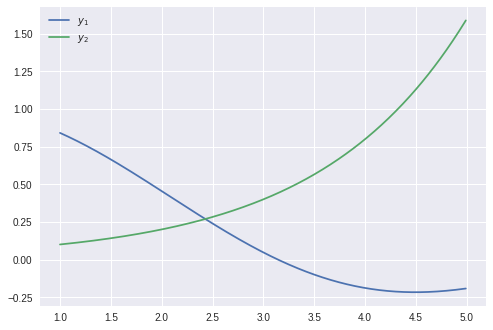

In [33]:
# Questão 01

plt.plot(x, y1, label='$y_1$')
plt.plot(x, y2, label='$y_2$')

plt.legend()

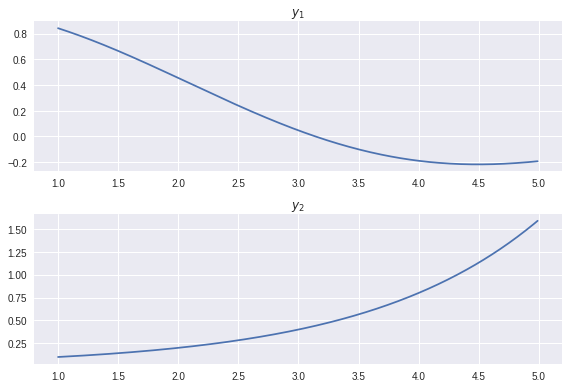

In [37]:
# Questão 02
plt.subplot(2, 1, 1)
plt.plot(x, y1)
plt.title('$y_1$')

plt.subplot(2, 1, 2)
plt.plot(x, y2)
plt.title('$y_2$')

plt.tight_layout()

## 1. Estilização dos Gráficos

- `color`
- `linewidth`
- `linestyle`
- `marker`
- `fontsize`
- `fontfamily`
- `fontweight`
- Utilização de LaTeX
- `alpha`
- ...

### Temas

[Documentação](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

In [38]:
df = pd.read_csv('../datasets/life_expectancy.csv')

In [39]:
df.head()

,Unnamed: 0,Year,Life Expectancy,Country
0,0,1950,49.56,Brazil
1,1,1951,49.98,Brazil
2,2,1952,50.41,Brazil
3,3,1953,50.83,Brazil
4,4,1954,51.25,Brazil


In [40]:
df.columns

Index(['Unnamed: 0', 'Year', 'Life Expectancy', 'Country'], dtype='object')

In [41]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
df.head()

,Year,Life Expectancy,Country
0,1950,49.56,Brazil
1,1951,49.98,Brazil
2,1952,50.41,Brazil
3,1953,50.83,Brazil
4,1954,51.25,Brazil


In [43]:
df_brasil = df[df['Country'] == 'Brazil']
df_eua = df[df['Country'] == 'EUA']

In [44]:
df_brasil.head()

,Year,Life Expectancy,Country
0,1950,49.56,Brazil
1,1951,49.98,Brazil
2,1952,50.41,Brazil
3,1953,50.83,Brazil
4,1954,51.25,Brazil


In [45]:
df_eua.head()

,Year,Life Expectancy,Country
11,1950,51.41,EUA
12,1951,54.77,EUA
13,1952,55.68,EUA
14,1953,57.49,EUA
15,1954,58.35,EUA


In [61]:
plt.style.use('seaborn')

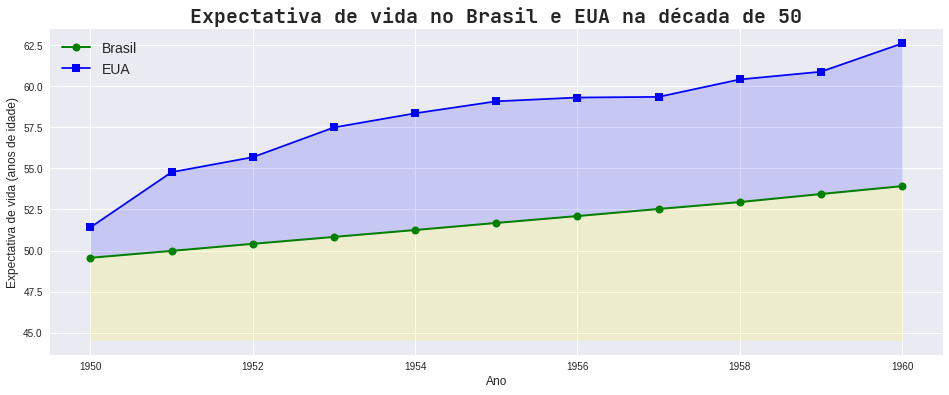

In [133]:
plt.figure(figsize=(16, 6))

plt.plot(df_brasil['Year'], df_brasil['Life Expectancy'], label='Brasil', color='green', linewidth=2, linestyle='-', marker='o', markersize=8)
plt.plot(df_eua['Year'], df_eua['Life Expectancy'], label='EUA', color='blue', marker='s', markersize=8)

plt.fill_between(df_brasil['Year'], df_brasil['Life Expectancy'], df_brasil['Life Expectancy'].min() - 5, alpha=0.15, color='yellow')
plt.fill_between(df_brasil['Year'], df_eua['Life Expectancy'], df_brasil['Life Expectancy'], color='blue', alpha=0.15)

plt.xlabel('Ano', fontsize=12)
plt.ylabel('Expectativa de vida (anos de idade)', fontsize=12)
plt.title('Expectativa de vida no Brasil e EUA na década de 50', fontsize=20, fontweight='bold', fontfamily='Jetbrains Mono')

plt.legend(fontsize=14)

plt.savefig('images/life_expectancy.jpg', facecolor='white')

## 2. Outros tipos de Gráficos
---

### 2.1. Gráficos de Barras

Utilizando o dataset `life_expectancy.csv`...

<BarContainer object of 11 artists>

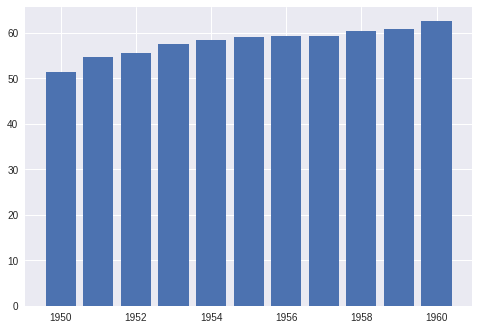

In [136]:
plt.bar(df_eua['Year'], df_eua['Life Expectancy'])

<BarContainer object of 11 artists>

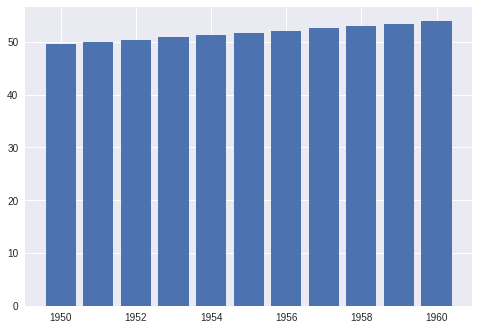

In [137]:
plt.bar(df_brasil['Year'], df_brasil['Life Expectancy'])

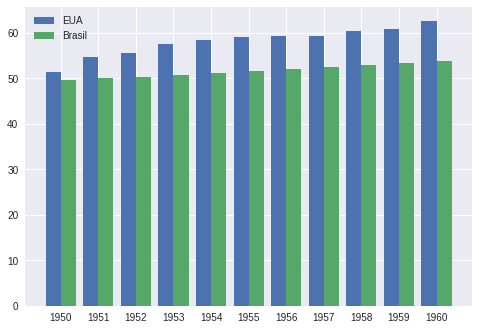

In [154]:
plt.bar(df_eua['Year'] - 0.2, df_eua['Life Expectancy'], label='EUA', width=0.4)
plt.bar(df_brasil['Year'] + 0.2, df_brasil['Life Expectancy'], label='Brasil', width=0.4)

plt.xticks(df_brasil['Year'], rotation=0)

plt.legend()

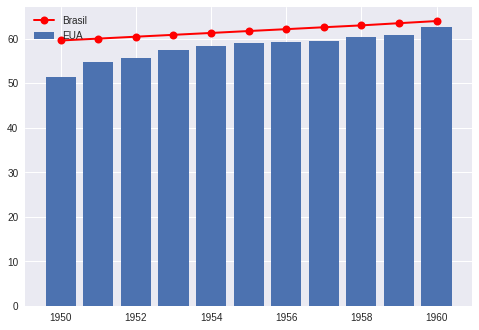

In [147]:
plt.bar(df_eua['Year'], df_eua['Life Expectancy'], label='EUA')
plt.plot(df_brasil['Year'], df_brasil['Life Expectancy'] + 10, label='Brasil', color='red',\
             linewidth=2, linestyle='-', marker='o', markersize=8)

plt.legend()

#### Horizontal

<BarContainer object of 11 artists>

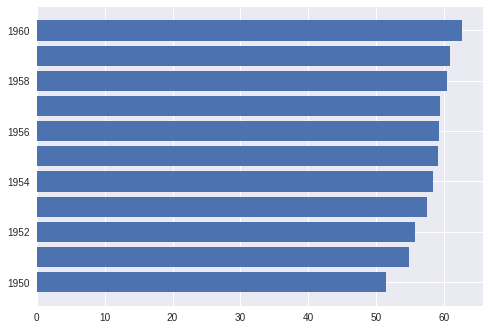

In [148]:
plt.barh(df_eua['Year'], df_eua['Life Expectancy'], label='EUA')

### 2.2. Gráfico de Dispersão

In [155]:
array1 = np.random.randint(1, 100, 500)
array2 = np.random.randint(1, 100, 500)

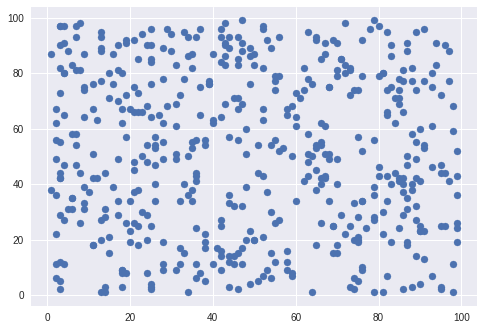

In [156]:
plt.scatter(array1, array2)

### 2.3. Gráfico de Pizza

Utilizando o dataset `fish.csv`...

In [157]:
df = pd.read_csv('../datasets/fish.csv')

In [158]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [160]:
df_species_counts = df['Species'].value_counts()

df_species_counts

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

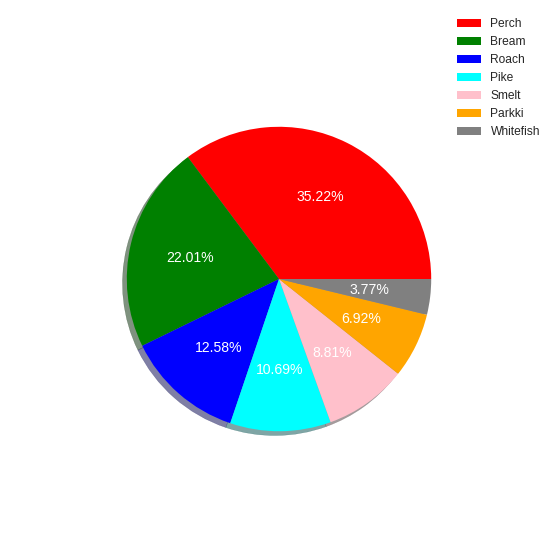

In [182]:
plt.figure(figsize=(10, 10))

plt.pie(df_species_counts.values, labels=df_species_counts.index,\
            colors=['red', 'green', 'blue', 'cyan', 'pink', 'orange', 'gray'],\
            autopct='%.2f%%', frame=False, shadow=True, radius=0.7, textprops={'color': 'white', 'fontsize': 14})

plt.legend(fontsize=12)
plt.show()

### 2.4. Histograma

(array([35., 20.,  0.,  6.,  0., 11., 56.,  0., 17., 14.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

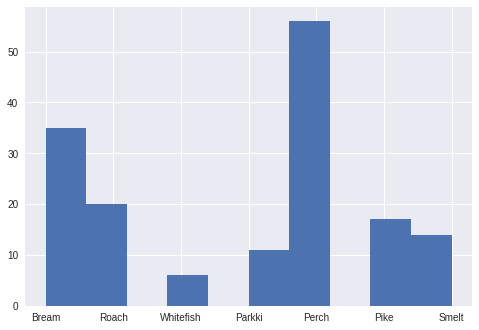

In [184]:
plt.hist(df['Species'])